# 1. PCA
# Step by Step PCA
Let's apply PCA step-by-step to understand the process.

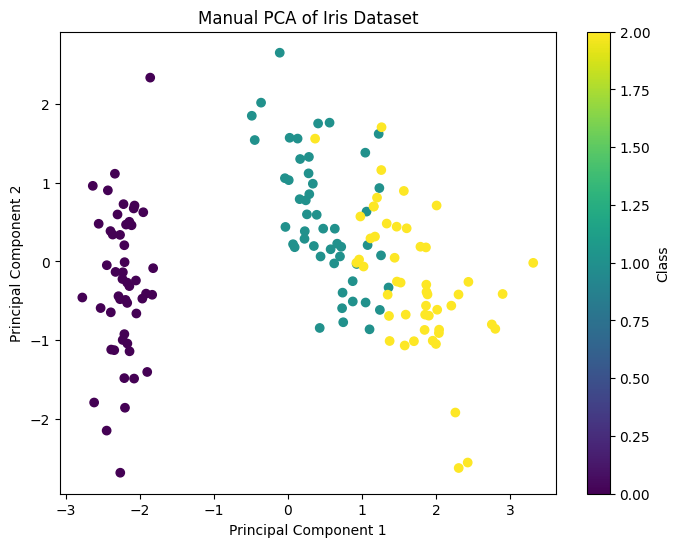

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# Load Dataset (Iris)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# 1. Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Compute Covariance Matrix 
cov_matrix = np.cov(X_scaled.T)

# 3. Compute Eigenvalues and Eigenvectors 
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 4. Sort Eigenvalues and Eigenvectors by Magnitude
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# 5. Project Data onto the Top 2 Principal Components
X_pca_manual = np.dot(X_scaled, eigenvectors[:, :2])

# Visualize the Reduced Data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_manual[:,0], X_pca_manual[:, 1], c=data.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Manual PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

# PCA in Machine Learning Pipelines
Use PCA to preprocess before  classification or regression.

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 
from sklearn.decomposition import PCA

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data.target, test_size=0.3, random_state=42)

# PCA + Logistic Regression Pipelime
pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy after PCA:', accuracy_score(y_test, y_pred))

Accuracy after PCA: 0.9111111111111111


# 2. Non-Linear Dimensionality Reduction
__t-SNE Deep Dive__
1. Purpose. Focuses on preserving local structure of data for visualization
2. Parameters. 
    - Perplexity. Influences how the algorithm balances local vs global structure.
    - Learning Rate. Controls the gradient descendent process.
3. t-SNE Example on MNIST(Digit Dataset)

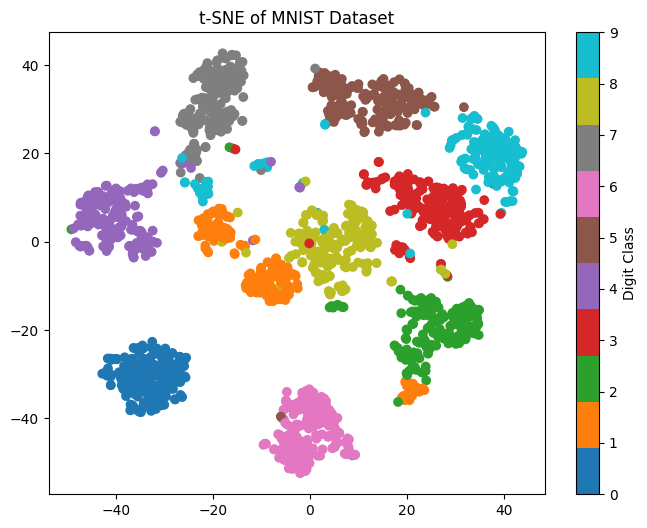

In [4]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load MNIST Digits Dataset
digits = load_digits()
X, y = digits.data, digits.target

# Standarize Data
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:,1], c=y, cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('t-SNE of MNIST Dataset')
plt.show()

__Dimensionality Redution in Real-World Problems__
1. PCA can compress image data (e.g. reducing pixel information while reatining structure).
Example

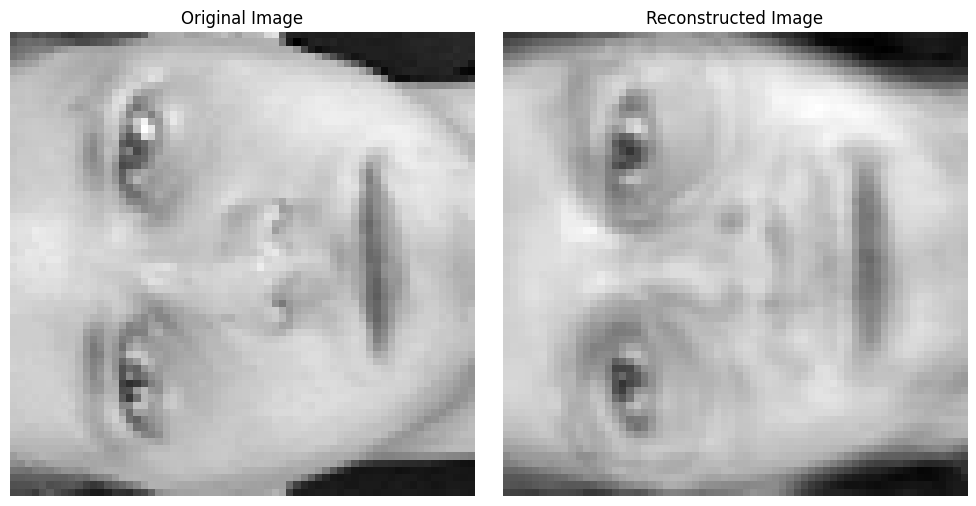

In [15]:
from sklearn.decomposition import PCA 
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load Olivetti Faces Dataset
faces = loadmat('../olivettifaces.mat')
X_faces = faces['faces'].T

# Appy PCA for Compression
pca = PCA(n_components=50)
X_faces_pca = pca.fit_transform(X_faces)
X_faces_reconstructed = pca.inverse_transform(X_faces_pca)

# Visualize Original and reconstructed Image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X_faces[0].reshape(64, 64), cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(X_faces_reconstructed[0].reshape(64, 64), cmap='gray')
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.datasets import fetch_olivetti_faces
from scipy.io import loadmat 
olivetti_faces = loadmat('../olivettifaces.mat')
X=olivetti_faces['faces'].T
